In [128]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler

Los datos de esta actividad los descargue de: https://www.kaggle.com/datasets/saurav9786/cardiogoodfitness

In [129]:
#Cargar los datos
filename = 'C:/Users/Lucía Alvarez/OneDrive - psico.edu.uy/00 Barcelona activa/CardioGoodFitness.csv'
df = pd.read_csv(filename, sep=",", encoding="utf8") 
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


#### Ejercicio 1 (parte a)
Coge un conjunto de datos de tema deportivo que te guste y normaliza los atributos categóricos en dummy. 

In [130]:
#Evaluar qué variables son dicotómicos
df.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
TM195    18   Male    14         Single         3      4        29562   112      1
TM498    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
TM195    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
TM798    48   Male    18         Partnered      4      5        95508   180      1
Length: 1

"Gender" y "MaritalStatus" son variables dicotómicas. Las variables mencionadas serán seleccionadas para la normalización de atributos categóricos en dummy.

In [131]:
df_Solo_Binarias = df.drop(columns =['Product', 'Age', 'Education','Usage', 'Fitness','Income', 'Miles'])

df_Solo_Binarias

,Gender,MaritalStatus
0,Male,Single
1,Male,Single
2,Female,Partnered
3,Male,Single
4,Male,Partnered
...,...,...
175,Male,Single
176,Male,Single
177,Male,Single
178,Male,Partnered


In [132]:
dummy = pd.get_dummies(df_Solo_Binarias)
dummy

,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,0,1,0,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
...,...,...,...,...
175,0,1,0,1
176,0,1,0,1
177,0,1,0,1
178,0,1,1,0


In [133]:
# Fusionar las variables dummies con el dataframe original
df_Con_dummies = pd.concat([df, dummy], axis=1)
df_Con_dummies.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,TM195,18,Male,14,Single,3,4,29562,112,0,1,0,1
1,TM195,19,Male,15,Single,2,3,31836,75,0,1,0,1
2,TM195,19,Female,14,Partnered,4,3,30699,66,1,0,1,0
3,TM195,19,Male,12,Single,3,3,32973,85,0,1,0,1
4,TM195,20,Male,13,Partnered,4,2,35247,47,0,1,1,0


#### Ejercicio 1 (parte b)
Estandariza los atributos numéricos con StandardScaler.

In [134]:
#Para realizar el análisis es necesario quedarse únicamente con las variables númericas
df_numerica = df.drop(columns =['Product', 'Gender', 'Education',  'MaritalStatus', 'Usage', 'Fitness'])
df_numerica

,Age,Income,Miles
0,18,29562,112
1,19,31836,75
2,19,30699,66
3,19,32973,85
4,20,35247,47
...,...,...,...
175,40,83416,200
176,42,89641,200
177,45,90886,160
178,47,104581,120


In [135]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numerica)
scaled_df

array([[-1.55814595e+00, -1.46758505e+00,  1.70256539e-01],
       [-1.41372459e+00, -1.32943841e+00, -5.45143176e-01],
       [-1.41372459e+00, -1.39851173e+00, -7.19159323e-01],
       [-1.41372459e+00, -1.26036508e+00, -3.51791902e-01],
       [-1.26930324e+00, -1.12221843e+00, -1.08652674e+00],
       [-1.26930324e+00, -1.26036508e+00, -7.19159323e-01],
       [-1.12488188e+00, -1.12221843e+00, -5.45143176e-01],
       [-1.12488188e+00, -1.26036508e+00, -3.51791902e-01],
       [-1.12488188e+00, -1.12221843e+00,  7.30975235e-01],
       [-1.12488188e+00, -9.84071783e-01, -3.51791902e-01],
       [-9.80460529e-01, -1.05314511e+00, -3.51791902e-01],
       [-9.80460529e-01, -1.12221843e+00, -7.19159323e-01],
       [-9.80460529e-01, -1.05314511e+00, -5.45143176e-01],
       [-9.80460529e-01, -1.12221843e+00, -5.45143176e-01],
       [-8.36039174e-01, -9.14998459e-01, -1.08652674e+00],
       [-8.36039174e-01, -7.76851810e-01, -5.45143176e-01],
       [-8.36039174e-01, -1.19129176e+00

In [136]:
# Concatenar  Numpy Array (con las variables numéricas  estandarizadas) con el DataFrame que teníamos antes
df_new = pd.concat([df_Con_dummies, pd.DataFrame(scaled_df)], axis=1)
df_new

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single,0,1,2
0,TM195,18,Male,14,Single,3,4,29562,112,0,1,0,1,-1.558146,-1.467585,0.170257
1,TM195,19,Male,15,Single,2,3,31836,75,0,1,0,1,-1.413725,-1.329438,-0.545143
2,TM195,19,Female,14,Partnered,4,3,30699,66,1,0,1,0,-1.413725,-1.398512,-0.719159
3,TM195,19,Male,12,Single,3,3,32973,85,0,1,0,1,-1.413725,-1.260365,-0.351792
4,TM195,20,Male,13,Partnered,4,2,35247,47,0,1,1,0,-1.269303,-1.122218,-1.086527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200,0,1,0,1,1.619124,1.804073,1.871748
176,TM798,42,Male,18,Single,5,4,89641,200,0,1,0,1,1.907967,2.182245,1.871748
177,TM798,45,Male,16,Single,5,5,90886,160,0,1,0,1,2.341231,2.257879,1.098343
178,TM798,47,Male,18,Partnered,4,5,104581,120,0,1,1,0,2.630073,3.089857,0.324938


In [137]:
#Renombrar las columnas
df_new.columns = ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus',
                 'Usage', 'Fitness', 'Income', 'Miles', 'Gender_Female',
                 'Gender_Male', 'MaritalStatus_Partnered','MaritalStatus_Single', 
                  'Age_estandarizada', 'Income_estandarizada', 'Miles_estandarizada']
df_new

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single,Age_estandarizada,Income_estandarizada,Miles_estandarizada
0,TM195,18,Male,14,Single,3,4,29562,112,0,1,0,1,-1.558146,-1.467585,0.170257
1,TM195,19,Male,15,Single,2,3,31836,75,0,1,0,1,-1.413725,-1.329438,-0.545143
2,TM195,19,Female,14,Partnered,4,3,30699,66,1,0,1,0,-1.413725,-1.398512,-0.719159
3,TM195,19,Male,12,Single,3,3,32973,85,0,1,0,1,-1.413725,-1.260365,-0.351792
4,TM195,20,Male,13,Partnered,4,2,35247,47,0,1,1,0,-1.269303,-1.122218,-1.086527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200,0,1,0,1,1.619124,1.804073,1.871748
176,TM798,42,Male,18,Single,5,4,89641,200,0,1,0,1,1.907967,2.182245,1.871748
177,TM798,45,Male,16,Single,5,5,90886,160,0,1,0,1,2.341231,2.257879,1.098343
178,TM798,47,Male,18,Partnered,4,5,104581,120,0,1,1,0,2.630073,3.089857,0.324938


#### Ejercicio 2
Continúa con el conjunto de datos de tema deportivo que te guste y aplica el análisis de componentes principales.

A continuación, se explora las variables numéricas.
Para este análisis continuamos trabajando con la base de datos que tiene las variables numéricas estandarizadas. En este análisis se trabaja con "Edad", "Ingreso" y "Millas recorridas".

In [138]:
#Explorar los datos
df_numerica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     180 non-null    int64
 1   Income  180 non-null    int64
 2   Miles   180 non-null    int64
dtypes: int64(3)
memory usage: 4.3 KB


In [139]:
print('Media de cada variable')
df_numerica.mean(axis=0)

Media de cada variable


Age          28.788889
Income    53719.577778
Miles       103.194444
dtype: float64

In [140]:
print('Varianza de cada variable')
df_numerica.var(axis=0)

Varianza de cada variable


Age       4.821217e+01
Income    2.724706e+08
Miles     2.689833e+03
dtype: float64

Al observar la media y desvío estándar de las variables numéricas se observa que tienen diferente media y dispersión.

Para realizar el análisis de componentes principales, es necesario estandarizar las variables numéricas, evitando así, que la variable "Income" domine la mayoría de los componentes, dado que es la variable con mayor media y dispersión en comparación con el resto de las variables.


In [141]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
pca_pipe.fit(df_numerica)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

 En el análisis de componentes principales se opta por trabajar con dos componentes.

In [142]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_numerica.columns,
    index   = ['PC1', 'PC2']
)

,Age,Income,Miles
PC1,0.492830,0.698409,0.518983
PC2,-0.727015,0.002797,0.686616


En el código anterior, se accedió a la información referida a los componentes principales obtenidos. Específicamente, se accedió a los loadings que definen a cada componente.

En el primer componente, Income presenta el mayor loading, seguido por Age y Miles. 

En el segundo componente las cargas son menores en comparación con el primer componente. 
En este componente, Miles es el que presenta mayor loading, seguido por Income y Age (con un loading negativo).

Al observar los pesos asignados a cada componente se deduce que no hay un patrón claro. Esto se deduce dado que, en el primer componente, los pesos asignados son bastante similares entre si. En el segundo componente, Miles es el que tiene mayor peso. Sin embargo, también se observa un peso negativo (en Age) y una carga muy pequeña (Income)



In [143]:
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)


Porcentaje de varianza explicada por cada componente
[0.58871317 0.3211473 ]


El primer componente explica el 59% de la varianza observada.
Mientras que los dos componentes explican el 91% de la varianza observada.

En suma, se podría concluir que el análisis de componentes principales permite reducir las 3 variables numéricas en dos componentes. Empero, sería necesario evaluar si los componentes obtenidos son correctos, dado que los loadings en cada componente presentan un patrón inusual o no claro. A su vez, se observa que el primer componente explica casi el 60% de la varianza observada, mientras que el segundo explica menos que el 35%. 


#### Ejercicio 3
Continúa con el conjunto de datos de tema deportivo que te guste y normaliza los datos teniendo en cuenta a los outliers

In [144]:
df_numerica

,Age,Income,Miles
0,18,29562,112
1,19,31836,75
2,19,30699,66
3,19,32973,85
4,20,35247,47
...,...,...,...
175,40,83416,200
176,42,89641,200
177,45,90886,160
178,47,104581,120


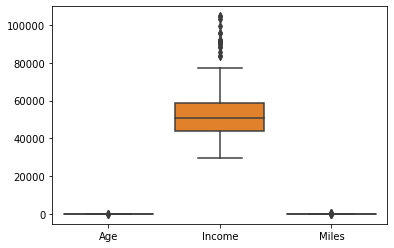

In [145]:
#Explorar los datos mediante un boxplot
ax = sns.boxplot(data=df_numerica)

Se visualiza las tres variables en boxplot diferentes dado que en el gráfico anterior no se logra visualizar las variables correctamente

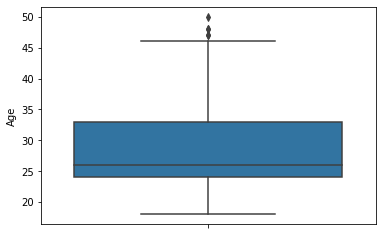

In [146]:
ax = sns.boxplot( y="Age", data=df_numerica)

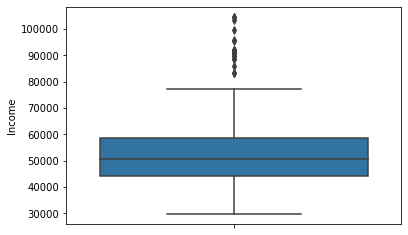

In [147]:
ax = sns.boxplot( y="Income", data=df_numerica)

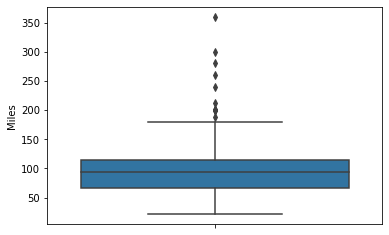

In [148]:
ax = sns.boxplot( y="Miles", data=df_numerica)

Para explorar el comportamiento de los outliers se seleccionó la variable Age. Este proceso se podría haber realizado con las tres variables. Empero, el trabajo con las tres variables se realizará con el IQR Robust Scaler Transform

In [149]:
# Encontrar el primer cuartil
q1 = np.quantile(df_numerica.Age, 0.25)
 
# Encontrar el tercer cuartil
q3 = np.quantile(df_numerica.Age, 0.75)
med = np.median(df_numerica.Age)
 
# Encontrar el rango interquartil (IQR)
iqr = q3-q1
 
# Encontrar los bigotes superior e inferior
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

9.0 46.5 10.5


In [150]:
outliers = df_numerica.Age[(df_numerica.Age <= lower_bound) | (df_numerica.Age >= upper_bound)]
print('Los outlier del boxplot de la variable Age son:{}'.format(outliers))

Los outlier del boxplot de la variable Age son:78     47
79     50
139    48
178    47
179    48
Name: Age, dtype: int64


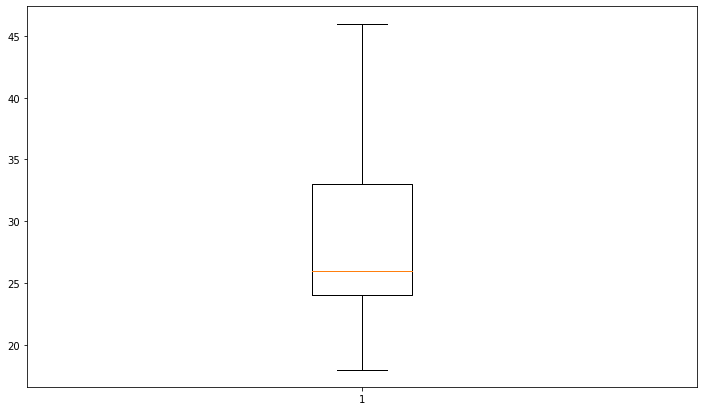

In [151]:
# Boxplot de Age sin los outliers
arr2 = df_numerica.Age[(df_numerica.Age >= lower_bound) & (df_numerica.Age <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(arr2)
plt.show()

##### IQR Robust Scaler Transform

In [152]:
# Realizar una transformación escalar robusta del conjunto de datos
trans = RobustScaler()
data = trans.fit_transform(df_numerica)

# Convertir el array a un dataframe
df_normalizados_Outliers = DataFrame(data)

#Renombrar las columnas
df_normalizados_Outliers.columns = ['Age_N_Outlier','Income_N_Outlier', 'Miles_N_Outlier']
df_normalizados_Outliers


,Age_N_Outlier,Income_N_Outlier,Miles_N_Outlier
0,-0.888889,-1.439807,0.369231
1,-0.777778,-1.284152,-0.389744
2,-0.777778,-1.361980,-0.574359
3,-0.777778,-1.206325,-0.184615
4,-0.666667,-1.050670,-0.964103
...,...,...,...
175,1.555556,2.246488,2.174359
176,1.777778,2.672588,2.174359
177,2.111111,2.757808,1.353846
178,2.333333,3.695227,0.533333


In [153]:
print(df_normalizados_Outliers.describe())

       Age_N_Outlier  Income_N_Outlier  Miles_N_Outlier
count     180.000000        180.000000       180.000000
mean        0.309877          0.213774         0.188604
std         0.771500          1.129879         1.063869
min        -0.888889         -1.439807        -1.497436
25%        -0.222222         -0.447508        -0.574359
50%         0.000000          0.000000         0.000000
75%         0.777778          0.552492         0.425641
max         2.666667          3.695227         5.456410


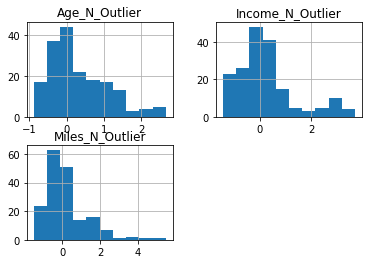

In [154]:
# Histograma de las variables transformadas
df_normalizados_Outliers.hist()
pyplot.show()

Podemos ver que las distribuciones se han ajustado. Los valores de la mediana son ahora cero y los valores de la desviación estándar son ahora cercanos a 1,0.

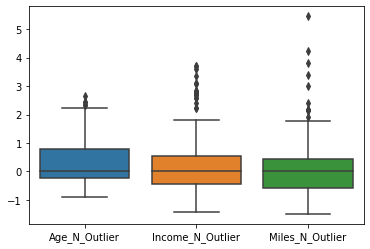

In [155]:
#Explorar los bloxplot de las nuevas variables

ax = sns.boxplot(data=df_normalizados_Outliers)

## Enlaces realcionados.
### Trabajar con dummies

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40


#### StandardScaler:
https://www.desarrollo-web-br-bd.com/es/python/alguien-puede-explicarme-standardscaler/829529418/

##### Como unir Numpy Array a Pandas DataFrame
https://www.statology.org/add-numpy-array-to-pandas-dataframe/

#### Análisis de componentes principales
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://www.cienciadedatos.net/documentos/py19-pca-python.html


#### Actividad outlier
https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

#### Robust Scaler Transform

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/